¡Hola, Marco!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>
    Se agregaron pruebas de Levene por prueba en el segmento de pruebas de hipótesis para validar varianzas en las pruebas t de medias.
</div> 

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Marco! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

In [3]:
import pandas as pd
import numpy as np 
from scipy import stats as st
from matplotlib import pyplot as plt


In [4]:
df_games = pd.read_csv('./datasets/games.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [5]:
df_games.head()



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


PREPARA LOS DATOS: 

Reemplaza los nombres de las columnas (ponlos en minúsculas).








In [7]:
df_games.columns = ['name', 'platform', 'year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score',
                   'user_score','rating']
df_games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Convierte los datos en los tipos necesarios.

In [8]:
# Reemplazar valores nulos con un valor por defecto (opcional, ajusta según tu contexto)
df_games['year_of_release'] = df_games['year_of_release'].fillna(0)

# Convertir a int (forzando si es necesario)
df_games['year_of_release'] = df_games['year_of_release'].astype(int)



<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

In [9]:
# Convertir 'year_of_release' a datetime, manejando valores nulos
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y', errors='coerce')

df_games['year_of_release'].dt.year


df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')


df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Se cambio la columna de "year_of_release" para que fuera un datetime y la de "usear_score" a un float en vez de object, esto con el fin de poder manipular los datos de forma correcta en futuros pasos. 

Si es necesario, elige la manera de tratar los valores ausentes.

Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Por lo pronto no rellenare ningun valor ausente puesto que mayormente son las calificaciones, y estos aun no me interesa manipularlos

Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

No longro encontrar en que columna se encuentran estos valores "TBD" por lo cual no me queda claro como deberia manejarlos 

In [10]:
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12355,Zill O'll Infinite Plus,PSP,2009-01-01,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,NaN
4329,PES 2009: Pro Evolution Soccer,Wii,2009-01-01,Sports,0.09,0.26,0.05,0.05,NaN,NaN,NaN
7177,Dino Stalker,PS2,2002-01-01,Shooter,0.07,0.06,0.08,0.02,50.0,6.3,M
698,Mario Bros.,NES,1983-01-01,Platform,0.51,0.12,1.63,0.02,NaN,NaN,NaN
14847,Brothers Conflict: Passion Pink,PSP,2012-01-01,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14270,Supreme Ruler: Cold War,PC,2011-01-01,Strategy,0.00,0.03,0.00,0.01,63.0,6.8,RP
5508,We Sing Deutsche Hits,Wii,2011-01-01,Misc,0.00,0.29,0.00,0.04,NaN,NaN,NaN
13903,JASF: Jane's Advanced Strike Fighters,PC,2011-01-01,Simulation,0.02,0.01,0.00,0.00,48.0,3.1,T
16177,Destiny Links,DS,2009-01-01,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
8408,Time and Eternity,PS3,2012-01-01,Role-Playing,0.06,0.03,0.06,0.02,42.0,5.0,T


Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [11]:
# Calcula las ventas totales
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Agrupa por nombre y calcula la suma de las ventas totales
sales_per_game = df_games.groupby(['name'])[['total_sales']].sum().reset_index()

print(sales_per_game)


                               name  total_sales
0                    Beyblade Burst         0.03
1                 Fire Emblem Fates         1.67
2              Frozen: Olaf's Quest         1.10
3        Haikyu!! Cross Team Match!         0.04
4                 Tales of Xillia 2         0.84
...                             ...          ...
11554    thinkSMART: Chess for Kids         0.01
11555                  uDraw Studio         2.42
11556  uDraw Studio: Instant Artist         0.19
11557    wwe Smackdown vs. Raw 2006         3.00
11558  ¡Shin Chan Flipa en colores!         0.14

[11559 rows x 2 columns]


In [12]:
df_games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

In [13]:
median_score = df_games['user_score'].median()

In [14]:
df_games['user_score'] = df_games['user_score'].fillna(median_score)

In [15]:
df_games['user_score'].isna().sum()

0

<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
Solamente te recomeindo compeltar los valores nulos de las score con la mediana par ano sesgar nuestros resultados. Esto dado que estamos trabajando con distribuciones sesgadas.


Como sabe si se deben reemplazar los valores ausentes por la media o el promedio? 


<div class="alert alert-block alert-info">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente pregunta, Marco! Se recomienda completar con la mediana en casos en los que trabajamos con distribuciones sesgadas, como en este caso

Paso 3. Analiza los datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [16]:
game_x_year = df_games.groupby(df_games['year_of_release'].dt.year)['name'].count().reset_index

game_x_year


<bound method Series.reset_index of year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64>

No todos los años son significativos, puesto que no hay tantos videojuegos lanzados como entre los años 2001 a 2016 

Observa cómo varían las ventas de una plataforma a otra. 

In [17]:
sales_per_platform = df_games.groupby(['platform'])[['total_sales']].sum().sort_values(by = ['total_sales'])

sales_per_platform

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,30.77


Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 

In [18]:
# Obtener las 5 plataformas con mayores ventas totales
top_5_platforms = sales_per_platform.nlargest(5, 'total_sales')

# Mostrar el resultado
print(top_5_platforms)


          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12


In [19]:
# Filtrar los datos para las 5 plataformas con mayores ventas
top_5_platform_names = top_5_platforms.index
df_top_5_platforms = df_games[df_games['platform'].isin(top_5_platform_names)]

# Crear la distribución por año para las plataformas principales
distribution = df_top_5_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Mostrar las primeras filas del resultado
print(distribution.head(10))



  year_of_release platform  total_sales
0      1985-01-01       DS         0.02
1      2000-01-01      PS2        39.17
2      2001-01-01      PS2       166.43
3      2002-01-01      PS2       205.38
4      2003-01-01      PS2       184.31
5      2004-01-01       DS        17.27
6      2004-01-01      PS2       211.81
7      2005-01-01       DS       130.14
8      2005-01-01      PS2       160.66
9      2005-01-01     X360         8.25


c:\Users\anton\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


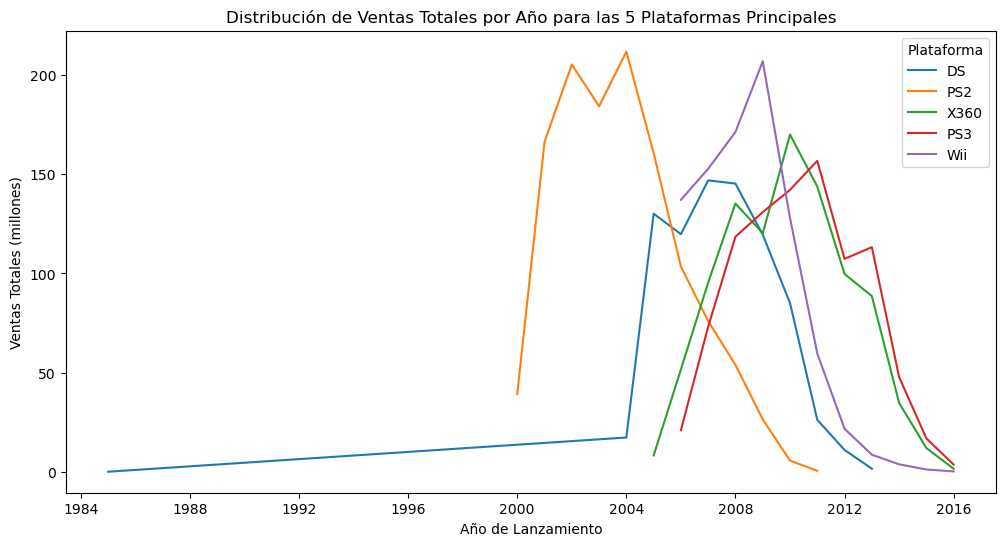

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=distribution, x='year_of_release', y='total_sales', hue='platform')

# Etiquetas y título
plt.title('Distribución de Ventas Totales por Año para las 5 Plataformas Principales')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.show()

Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

In [21]:
# Agrupar por plataforma y encontrar el último año con ventas
last_year_sales = df_games.groupby('platform')['year_of_release'].max().reset_index()
last_year_sales.columns = ['platform', 'last_year_with_sales']

# Mostrar las plataformas con su último año de ventas
print(last_year_sales)



   platform last_year_with_sales
0      2600           1989-01-01
1       3DO           1995-01-01
2       3DS           2016-01-01
3        DC           2008-01-01
4        DS           2013-01-01
5        GB           2001-01-01
6       GBA           2007-01-01
7        GC           2007-01-01
8       GEN           1994-01-01
9        GG           1992-01-01
10      N64           2002-01-01
11      NES           1994-01-01
12       NG           1996-01-01
13       PC           2016-01-01
14     PCFX           1996-01-01
15       PS           2003-01-01
16      PS2           2011-01-01
17      PS3           2016-01-01
18      PS4           2016-01-01
19      PSP           2015-01-01
20      PSV           2016-01-01
21      SAT           1999-01-01
22      SCD           1994-01-01
23     SNES           1999-01-01
24     TG16           1995-01-01
25       WS           2001-01-01
26      Wii           2016-01-01
27     WiiU           2016-01-01
28     X360           2016-01-01
29       X

In [22]:
# Asegúrate de que 'last_year_with_sales' sea solo el año
last_year_sales['last_year_with_sales'] = last_year_sales['last_year_with_sales'].dt.year

# Definir el año más reciente como un entero
latest_year = df_games['year_of_release'].dt.year.max()

# Identificar plataformas obsoletas (sin ventas en los últimos 5 años)
obsolete_platforms = last_year_sales[last_year_sales['last_year_with_sales'] < latest_year - 5]

print(obsolete_platforms)


   platform  last_year_with_sales
0      2600                  1989
1       3DO                  1995
3        DC                  2008
5        GB                  2001
6       GBA                  2007
7        GC                  2007
8       GEN                  1994
9        GG                  1992
10      N64                  2002
11      NES                  1994
12       NG                  1996
14     PCFX                  1996
15       PS                  2003
21      SAT                  1999
22      SCD                  1994
23     SNES                  1999
24     TG16                  1995
25       WS                  2001
29       XB                  2008


In [23]:
# Encontrar el primer y último año de ventas por plataforma
platform_lifecycle = df_games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_lifecycle.columns = ['platform', 'first_year_with_sales', 'last_year_with_sales']

# Calcular el tiempo de vida de cada plataforma
platform_lifecycle['lifecycle_years'] = platform_lifecycle['last_year_with_sales'] - platform_lifecycle['first_year_with_sales']

print(platform_lifecycle)


   platform first_year_with_sales last_year_with_sales lifecycle_years
0      2600            1980-01-01           1989-01-01       3288 days
1       3DO            1994-01-01           1995-01-01        365 days
2       3DS            2011-01-01           2016-01-01       1826 days
3        DC            1998-01-01           2008-01-01       3652 days
4        DS            1985-01-01           2013-01-01      10227 days
5        GB            1988-01-01           2001-01-01       4749 days
6       GBA            2000-01-01           2007-01-01       2557 days
7        GC            2001-01-01           2007-01-01       2191 days
8       GEN            1990-01-01           1994-01-01       1461 days
9        GG            1992-01-01           1992-01-01          0 days
10      N64            1996-01-01           2002-01-01       2192 days
11      NES            1983-01-01           1994-01-01       4018 days
12       NG            1993-01-01           1996-01-01       1095 days
13    

In [24]:
avg_lifecycle = platform_lifecycle['lifecycle_years'].mean()
median_lifecycle = platform_lifecycle['lifecycle_years'].median()

print('la vida promedio de las plataformas es de', avg_lifecycle)
print('la vida mediana de las plataformas es de', median_lifecycle)


la vida promedio de las plataformas es de 2780 days 11:36:46.451612896
la vida mediana de las plataformas es de 2192 days 00:00:00


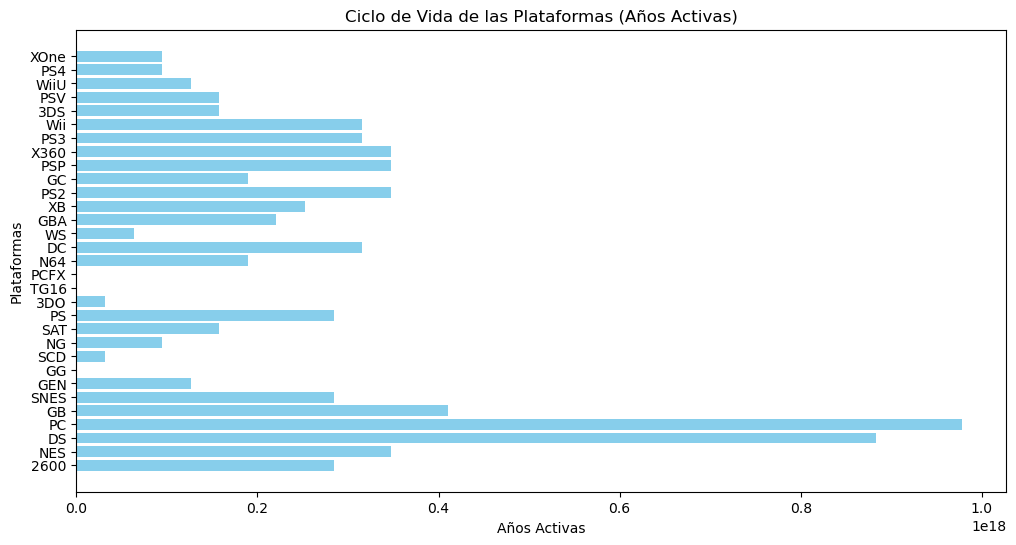

In [25]:
import matplotlib.pyplot as plt

# Visualizar la vida útil de las plataformas
plt.figure(figsize=(12, 6))
platform_lifecycle_sorted = platform_lifecycle.sort_values('first_year_with_sales')
plt.barh(platform_lifecycle_sorted['platform'], platform_lifecycle_sorted['lifecycle_years'], color='skyblue')

plt.title('Ciclo de Vida de las Plataformas (Años Activas)')
plt.xlabel('Años Activas')
plt.ylabel('Plataformas')
plt.show()


 ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
 
la vida promedio de las plataformas es de 2780 days 11:36:46.451612896
la vida mediana de las plataformas es de 2192 days 00:00:00

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

El periodo de donde se deberian tomar los datos es desde el año 2000 en adelante

Las plataformas lideres son: 
PS2     con      1255.77 ventas
X360    con       971.42 ventas
PS3     con       939.65 ventas
Wii     con       907.51 ventas
DS      con       806.12 ventas

estas ultimas son las mas rentables. 

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 


In [26]:
sales_x_year_x_name = df_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
sales_x_year_x_name.head()

,year_of_release,platform,total_sales
0,1980-01-01,2600,11.38
1,1981-01-01,2600,35.68
2,1982-01-01,2600,28.88
3,1983-01-01,2600,5.84
4,1983-01-01,NES,10.96


TypeError: Could not convert ['2600260026002600NES2600NES2600DSNESPC2600NES2600NES2600GBNESPC2600GBNESGBGENNESSNESGBGENNESSNESGBGENGGNESPCSNESGENNESNGSCDSNES3DOGBGENNESNGPCPSSATSCDSNES3DOGBNGPCPSSATSNESTG16GBN64NGPCPCFXPSSATSNESGBN64PCPSSATSNESDCGBN64PCPSSATSNESDCGBN64PCPSSATSNESWSDCGBGBAN64PCPSPS2WSXBDCGBGBAGCN64PCPSPS2WSXBDCGBAGCN64PCPSPS2XBGBAGCPCPSPS2XBDSGBAGCPCPS2PSPXBDSGBAGCPCPS2PSPX360XBDSGBAGCPCPS2PS3PSPWiiX360XBDCDSGBAGCPCPS2PS3PSPWiiX360XBDCDSPCPS2PS3PSPWiiX360XBDSPCPS2PS3PSPWiiX360DSPCPS2PS3PSPWiiX3603DSDSPCPS2PS3PSPPSVWiiX3603DSDSPCPS3PSPPSVWiiWiiUX3603DSDSPCPS3PS4PSPPSVWiiWiiUX360XOne3DSPCPS3PS4PSPPSVWiiWiiUX360XOne3DSPCPS3PS4PSPPSVWiiWiiUX360XOne3DSPCPS3PS4PSVWiiWiiUX360XOne'] to numeric

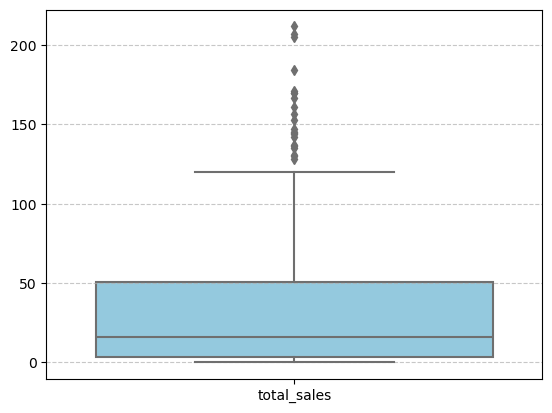

In [27]:
sns.boxplot(data=sales_x_year_x_name,
                color='skyblue', 
                saturation=0.75)
plt.grid(axis='y', linestyle='--', alpha=0.7)

sales_x_year_x_name.mean()


<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Como puedo eliminar los outliers?


<div class="alert alert-block alert-info">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Para hacer un análisis de valores atípicos, primero podemos realizar un gráfico de cajas para identificar estos valores y postriormente con un análisis de quartiles puedes seleccionar el rango mediante el cual eliminamos los valores

¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Si son significativas las diferencias en las ventas. 

Las ventas promedio son muy bajas a comparacion a los valores atipicos, se podria decir que en general los video juegos no son tan rentables hasta que se tiene un muy buen exito con algun juego particular. 

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 


In [26]:
df_games.head(1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


In [27]:
# Filtrar los datos para la plataforma PS2
ps2_games = df_games[df_games['platform'] == 'PS2'].copy()  # Asegúrate de crear una copia explícita del subconjunto

# Asegúrate de que 'critic_score' y 'user_score' sean numéricos
ps2_games.loc[:, 'critic_score'] = pd.to_numeric(ps2_games['critic_score'], errors='coerce')
ps2_games.loc[:, 'user_score'] = pd.to_numeric(ps2_games['user_score'], errors='coerce')

# Eliminar filas con valores NaN en las columnas relevantes
ps2_games = ps2_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])

ps2_games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004-01-01,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002-01-01,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001-01-01,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001-01-01,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004-01-01,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


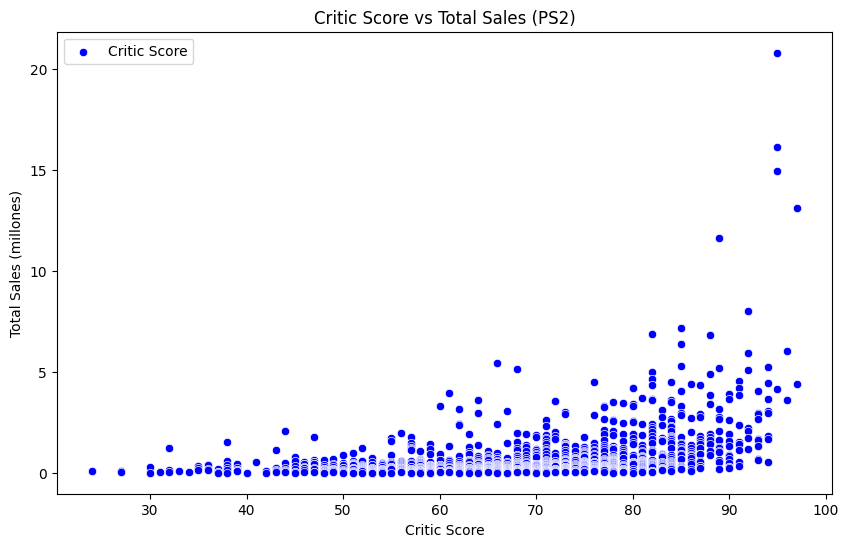

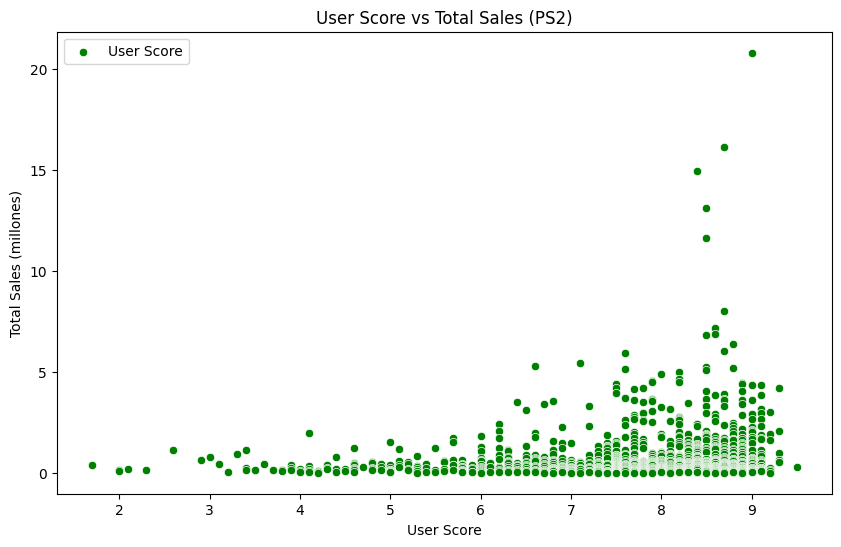

In [28]:


# Gráfico de dispersión: Critic Score vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps2_games, x='critic_score', y='total_sales', color='blue', label='Critic Score')
plt.title('Critic Score vs Total Sales (PS2)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millones)')
plt.legend()
plt.show()

# Gráfico de dispersión: User Score vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps2_games, x='user_score', y='total_sales', color='green', label='User Score')
plt.title('User Score vs Total Sales (PS2)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millones)')
plt.legend()
plt.show()


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

In [29]:
# Calcular la correlación entre Critic Score y Total Sales
critic_corr = ps2_games['critic_score'].corr(ps2_games['total_sales'])

# Calcular la correlación entre User Score y Total Sales
user_corr = ps2_games['user_score'].corr(ps2_games['total_sales'])

print(f"Correlación entre Critic Score y Total Sales: {critic_corr:.2f}")
print(f"Correlación entre User Score y Total Sales: {user_corr:.2f}")


Correlación entre Critic Score y Total Sales: 0.40
Correlación entre User Score y Total Sales: 0.17


Saca conclusiones:

La relacion entre ambas puntuaciones de los juegos tienen una influencia muy baja, por lo cual no se podria decir que es una variable significativa para el exito de un juego en la plataforma de PS2.


Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
Echa un vistazo a la distribución general de los juegos por género. 

In [30]:
GTA_SA = df_games[df_games['name'] == 'Grand Theft Auto: San Andreas'].copy()# Asegúrate de crear una copia explícita del subconjunto

GTA_SA = GTA_SA.dropna(subset=['name', 'platform', 'total_sales'])

GTA_SA.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004-01-01,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
875,Grand Theft Auto: San Andreas,XB,2005-01-01,Action,1.26,0.61,0.00,0.09,93.0,8.6,AO,1.96
2115,Grand Theft Auto: San Andreas,PC,2005-01-01,Action,0.00,0.93,0.00,0.04,93.0,8.9,M,0.97
10311,Grand Theft Auto: San Andreas,X360,2008-01-01,Action,0.08,0.02,0.00,0.01,NaN,7.5,M,0.11


In [31]:
df_games.groupby(['genre'])['total_sales'].sum()

genre
Action          1744.17
Adventure        237.59
Fighting         447.53
Misc             802.51
Platform         827.77
Puzzle           242.57
Racing           728.67
Role-Playing     934.56
Shooter         1052.45
Simulation       389.97
Sports          1331.27
Strategy         174.23
Name: total_sales, dtype: float64

¿Qué se puede decir de los géneros más rentables?: La unica corelacion que encuentro entre los generos mas rentables es que tienen que ver con mucho movimiento, por lo que se observa, Action, Shooter y sports son los que mas se venden y hasta cierto punto estan algo relacionados en su dinamica de juego.


¿Puedes generalizar acerca de los géneros con ventas altas y bajas?: Que los juegos menos rentables son muy distintos a los que son mas rentables. 



Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:




Las cinco plataformas principales. 


In [32]:
na_sales_x_platform = df_games.groupby(['platform'])['na_sales'].sum().sort_values()
eu_sales_x_platform = df_games.groupby(['platform'])['eu_sales'].sum().sort_values()
jp_sales_x_platform = df_games.groupby(['platform'])['jp_sales'].sum().sort_values()



In [33]:
na_sales_x_platform.tail()


platform
DS      382.40
PS3     393.49
Wii     496.90
PS2     583.84
X360    602.47
Name: na_sales, dtype: float64

In [34]:
eu_sales_x_platform.tail()

platform
PS      213.61
Wii     262.21
X360    270.76
PS3     330.29
PS2     339.29
Name: eu_sales, dtype: float64

In [35]:
jp_sales_x_platform.tail()

platform
3DS     100.67
SNES    116.55
PS2     139.20
PS      139.82
DS      175.57
Name: jp_sales, dtype: float64

Describe las variaciones en sus cuotas de mercado de una región a otra: 

En las ventas de NA se observa que Xbox tiene una ligera ventaja sobre PS2, pero se puede entender que son los mas grandes competidores en el mercado, dejando atras Al wii, ps3 y DS, 

Por otra parte en las ventas de EU se puede obsevar que el PS2 y el PS3 son las plataformas preferidas por el publicas sin embargo Xbos sigue estando atras de estos dos denjando al wii y PS  al final, aqui no tenemos la presencia del DS como en NA, 

Y por ultimo en JP podemos observar que las plataformas como DS, PS y PS2 son las mas predominantes en el mercado, tambien vemos la presencia de SNES Y 3DS en el mercado dejando fuera del mercado a Xbox entre los 5 mas vendidos. 

Es importante mencionar que las ventas de cada usuario son distiantas probablemente por la cantidad de poblacion en cada area. 



Los cinco géneros principales. 


In [36]:
na_sales_x_genre = df_games.groupby(['genre'])['na_sales'].sum().sort_values()
eu_sales_x_genre = df_games.groupby(['genre'])['eu_sales'].sum().sort_values()
jp_sales_x_genre = df_games.groupby(['genre'])['jp_sales'].sum().sort_values()


In [37]:
na_sales_x_genre.tail()

genre
Misc        407.27
Platform    445.50
Shooter     592.24
Sports      684.43
Action      879.01
Name: na_sales, dtype: float64

In [38]:
eu_sales_x_genre.tail()

genre
Misc       212.74
Racing     236.51
Shooter    317.34
Sports     376.79
Action     519.13
Name: eu_sales, dtype: float64

In [39]:
jp_sales_x_genre.tail()

genre
Misc            108.11
Platform        130.83
Sports          135.54
Action          161.43
Role-Playing    355.41
Name: jp_sales, dtype: float64

Explica la diferencia.

En las ventas por genero podemos observar que en NA y EU las ventas mas prominentes vienen de los generos Action, sports y Shooter en ese orden respectivo, y en el unico genero que se diferencian es en el 4to lugar en donde eu tiene Racing y NA tiene Platform, sin embargo el utltimo lugar es el mismo en los dos, 

Por otra parte JP tiene una lista diferente, se observa que en el primer lugar se tiene Role-playing y los demas resultados resultan identicos a estados unidos con la excepcion de shooter, 

Como se menciono en la descripcion pasada la cantidad de ventas puede variar por la cantidad de poblacion en cada sector. 


Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [40]:
na_sales_x_genre = df_games.groupby(['rating'])['na_sales'].sum().reset_index()
eu_sales_x_genre = df_games.groupby(['rating'])['eu_sales'].sum().reset_index()
jp_sales_x_genre = df_games.groupby(['rating'])['jp_sales'].sum().reset_index()

In [41]:
na_sales_x_genre

,rating,na_sales
0,AO,1.26
1,E,1292.99
2,E10+,353.32
3,EC,1.53
4,K-A,2.56
5,M,748.48
6,RP,0.00
7,T,759.75


In [42]:
eu_sales_x_genre

,rating,eu_sales
0,AO,0.61
1,E,710.25
2,E10+,188.52
3,EC,0.11
4,K-A,0.27
5,M,483.97
6,RP,0.08
7,T,427.03


In [43]:
jp_sales_x_genre

,rating,jp_sales
0,AO,0.00
1,E,198.11
2,E10+,40.20
3,EC,0.00
4,K-A,1.46
5,M,64.24
6,RP,0.00
7,T,151.40


En cada region se puede observar que el rating E es la que mas se vende, esto se puede atribuir a que la E es indicativo de everybody= para todos, por lo tanto se abre a todo el publico, de ahi en adelante las letras de rating van disminuyendo conforme el rango de edad sube de everybody a teenager hasta mature, por lo cual se ve una reduccion en las ventas, pero fuera de eso, como previamente mencionado, las diferencias entre la cantidad de ventas varia probablemente por la poblacion, sin embargo los tres mercados siguen la misma tendencia. 

Paso 5. Prueba las siguientes hipótesis:

H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

HA:  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


Establece tu mismo el valor de umbral alfa: 0.05



In [44]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN,31.38


In [45]:


# Redondear hacia arriba los valores de 'user_score'
df_games['user_score'] = np.ceil(df_games['user_score'])

# Eliminar los NaN antes de convertir a enteros
df_games['user_score'] = df_games['user_score'].dropna().astype(int)

# Filtrar por plataformas y calcular la media
xbox_one = df_games[df_games['platform'] == 'XOne']['user_score'].dropna().mean()
PC = df_games[df_games['platform'] == 'PC']['user_score'].dropna().mean()

print(f"Media de user_score para XOne: {xbox_one}")
print(f"Media de user_score para PC: {PC}")

alpha = 0.05

Media de user_score para XOne: 7.267206477732794
Media de user_score para PC: 7.61088295687885


In [46]:
df_games['user_score'].dropna().astype(int)

0        8
1        8
2        9
3        8
4        8
        ..
16710    8
16711    8
16712    8
16713    8
16714    8
Name: user_score, Length: 16715, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

In [47]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       16715 non-null  int64         
 10  rating           9949 non-null   object        
 11  total_sales      16715 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [48]:
from scipy.stats import levene

# Extraer las muestras de user_score para ambas plataformas
xbox_one_scores = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

# H0: varianzas iguales 
# HA: varianzas distintas

levene_stat, pvalue_levene = levene(xbox_one_scores, pc_scores)

if pvalue_levene <= alpha:
    print('Las varianzas son distintas')
    equal_var = False
else:
    print('Las varianzas son iguales')
    equal_var = True
    
print('p-valor Levene:', pvalue_levene)


Las varianzas son iguales
p-valor Levene: 0.9365853255119952


In [49]:
from scipy.stats import ttest_ind

# Verificar si las muestras tienen suficiente tamaño y varianza
if len(xbox_one_scores) < 2 or len(pc_scores) < 2:
    print("No es posible realizar el t-test: una de las muestras tiene menos de 2 datos.")
elif xbox_one_scores.var() == 0 or pc_scores.var() == 0:
    print("No es posible realizar el t-test: una de las muestras tiene varianza 0.")
else:
    # Realizar el t-test si las condiciones son válidas
    t_value, pvalue = ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)

    if pvalue <= alpha:
        print('Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.')
    else:
        print('Aceptamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son las mismas.')
    
    print('p-valor:', pvalue)


Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.
p-valor: 0.0004376465164835162


H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

HA: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son Iguales.


In [50]:
df_games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54


In [51]:
Action = df_games[df_games['genre'] == 'Action']['user_score'].dropna().mean()
Sports = df_games[df_games['genre'] == 'Sports']['user_score'].dropna().mean()

In [52]:
Action = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
Sports = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

from scipy.stats import ttest_ind

# Verificar si las muestras tienen suficiente tamaño y varianza
if len(Action) < 2 or len(Sports) < 2:
    print("No es posible realizar el t-test: una de las muestras tiene menos de 2 datos.")
elif Action.var() == 0 or Sports.var() == 0:
    print("No es posible realizar el t-test: una de las muestras tiene varianza 0.")
else:
    # Realizar el t-test si las condiciones son válidas
    t_value, pvalue = ttest_ind(Action, Sports, equal_var=equal_var)

    if pvalue <= alpha:
        print('Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son Iguales.')
    else:
        print('Aceptamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.')
    
    print('p-valor:', pvalue)


Aceptamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
p-valor: 0.8375440864671541


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Además, lo complementaste con la prueba de levene para mostrar el supuesto de varianzas iguales. 

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

La hipotesis Nula se proporciono para el ejercicio y la alternativa se formulo dandole la contratia a la hipotesis nula 

— Qué criterio utilizaste para probar las hipótesis y por qué.

Al estarse tratando de dos muestras independientes en ambos casos, en el primero siendo Xboxone vs PC y el otro caso siendo Action vs Sports, el ttest resulto ser la mejor opcion en especial porque se buscaba saber si eran iguales o diferentes.

Paso 6. Escribe una conclusión general:

Se puede concluir que los juegos de Accion son los que tienen la mayor prominencia en la industria de los video juegos seguidos por los shooters y Sports, es importante considerar que el mercado de JP es leal a sus plataformas sin embargo en EU y NA sigue habiendo competencia entre Xbox y PS2/3, para 2017, el enfoque deberia estar en juegos de accion, shooters y sports sin embargo en JP se le debe dar mayor importancia a los juegos de rol puesto que son los mas vendidos alla en las plataformas como DS Y PS.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Marco, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    

    
</div>